## The data

This is data taken from tests of exercises 1 and 2 for different numbers of particles (contained in this directory, named input_Nb.txt where N is the number of particles or "b"odies). 

I have measured the time it takes for each specific run 5 separate times, and in the code below you may find the results (averages) and the standard deviations. A table is also available in the README.md, with all the measurements and the final values (plus/minus the standard deviation) for each case.

<IPython.core.display.Javascript object>


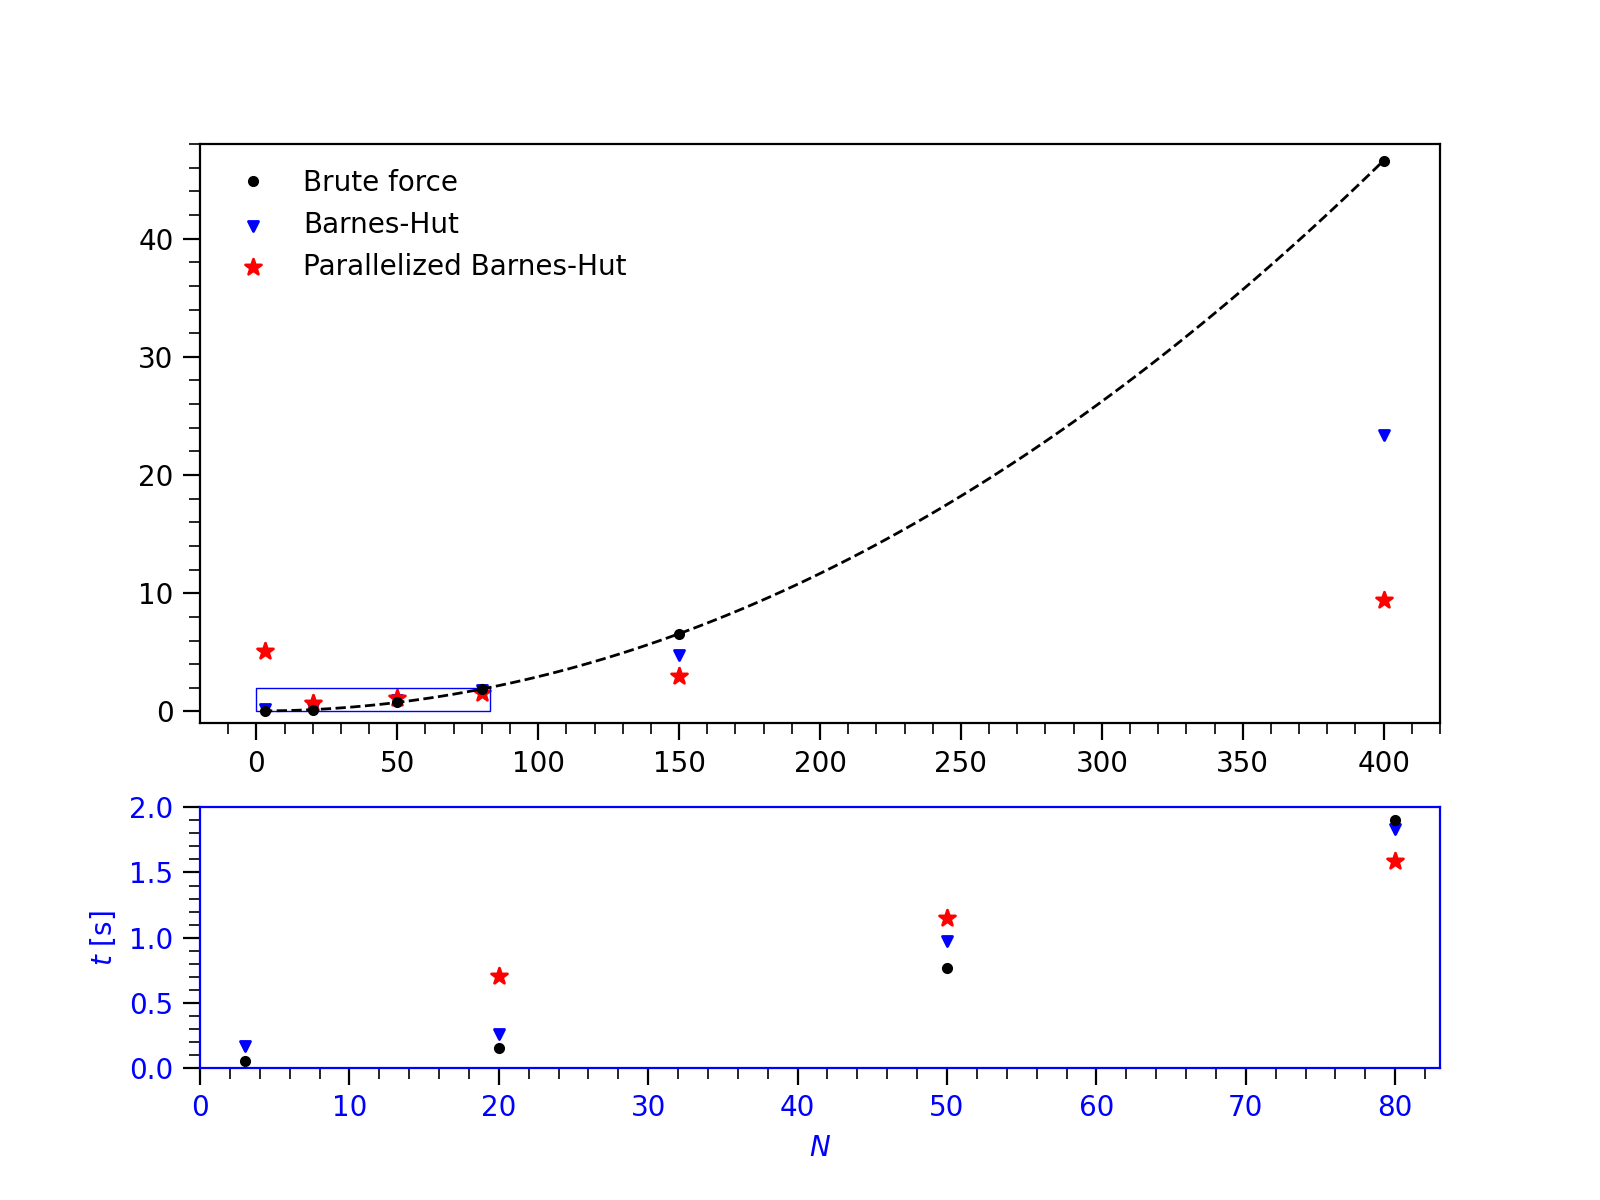

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
%matplotlib notebook

"""
The data
"""

NN = np.array([3, 20, 50, 80, 150, 400])
NN_long = np.linspace(2, 400, 100)

brute_force     = np.array([0.054, 0.152, 0.765, 1.903, 6.581, 46.60])
brute_force_std = np.array([0.003, 0.002, 0.003, 0.007, 0.007, 0.06])

barnes_hut     = np.array([0.170, 0.261, 0.971, 1.834, 4.81, 23.39])
barnes_hut_std = np.array([0.002, 0.001, 0.004, 0.005, 0.02, 0.04])

parallel     = np.array([5.08, 0.708, 1.151, 1.59, 2.971, 9.41])
parallel_std = np.array([0.02, 0.002, 0.007, 0.01, 0.007, 0.02])


"""
Plot the results
"""

fig, axs = plt.subplots(2,1, figsize=(8, 6), gridspec_kw=dict(height_ratios=(1,0.45)))
ax0, ax1 = axs

ax0.plot(NN, brute_force, 'k.', label='Brute force')
ax0.scatter(NN, barnes_hut, c='b', marker='v', label='Barnes-Hut', s=13)
ax0.scatter(NN, parallel, c='r', marker='*', label='Parallelized Barnes-Hut')

# The errors are very small and will be invisible at this scale, so I will not plot them.

"""
Smaller axis (zoom-in)
"""

# Color the spines to signify the zoom-in
for which in ['top', 'bottom', 'left', 'right']:
    ax1.spines[which].set_color('blue')

# Same data but not all points
ax1.plot(NN[:-2], brute_force[:-2], 'k.', label='Brute force')
ax1.scatter(NN[:-2], barnes_hut[:-2], c='b', marker='v', label='Barnes-Hut', s=13)
ax1.scatter(NN[:-2], parallel[:-2], c='r', marker='*', label='Parallelized Barnes-Hut')

# Details
ax1.set_ylim(0,2)
ax1.set_xlim(0, 83)
ax1.tick_params(labelcolor='blue', which='both')
ax1.set_xlabel('$N$', color='blue')
ax1.set_ylabel('$t~\mathrm{[s]}$', color='blue')


"""
Clarify the zoom-in rectangle in the big axis
"""
rect = Rectangle((0, 0), 83, 2, edgecolor='blue', facecolor='none', linewidth=0.5)
ax0.add_patch(rect)


"""
Guideline curves
"""
fit = np.polyfit(NN, brute_force, 2) # Should be roughly prop. to N**2
result = np.polyval(fit, NN_long)

ax0.plot(NN_long, result, linestyle='dashed', linewidth=1, color='k')


"""
Final details
"""
ax0.set_ylim(-1, 48)
ax0.legend(frameon=False)

for ax in [ax0, ax1]:
    ax.minorticks_on()
    ax.tick_params(which='major', labelsize=10, size=6)
    ax.tick_params(which='minor', size=4)

### Explanation:

This plot shows the tendencies of the elapsed time (wall time, not CPU time!) for different cases of the N-body simulation, both in terms of computing strategy and particle number. The lower panel shows a zoom-in to see the order better for low N. 

The first case is the brute force scenario (exercise 1), where no special approach is taken. The code increases in computing time quickly, reaching almost 1 minute for 400 particles. 1 minute is very, very little, especially considering that this is run on an ordinary laptop, but 400 particles is also extremely few for many astrophysical applications and is not a very interesting case study (cosmological simulations tend to have hundreds of thousands of particles at the very least. The millenium simulation (https://wwwmpa.mpa-garching.mpg.de/millennium/), run in 2005, contained 10^10 dark matter particles). 

The second case uses the Barnes-Hut algorithm. For the smallest Ns, it is actually less efficient, given that creating the tree is a costly process for an end-result that works exactly the same as if we had not created the tree. But from N=80 onwards it is more efficient, and the elapsed time is almost halved for N=400.

The third case uses the Barnes-Hut algorithm and also parallelizes. In this case, for N=3 the elapsed time is actually much larger than the other cases and larger than any of the other parallelized runs other than N=400, which is strange. I speculate that this is due to some kind of overhead that occurs because the number of processes to be run is actually smaller than the number of available nodes (in my laptop, 8). But for the rest of them, where the elapsed time increases monotonically with N, this case is the least efficient for N<50 and the most efficient from N=80 onwards. This is because opening the parallel block and distributing the workload is also a costly process, so it is only worth it for large computing tasks. 

For N=400, we go from the brute-force approach taking 46.60 s to the parallelized Barnes-Hut taking 9.41 s. 